In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
%matplotlib inline

In [2]:
df=pd.read_csv("data/FuelConsumption.csv")

In [3]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [4]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<module 'matplotlib.pyplot' from 'c:\\Users\\DeLL\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

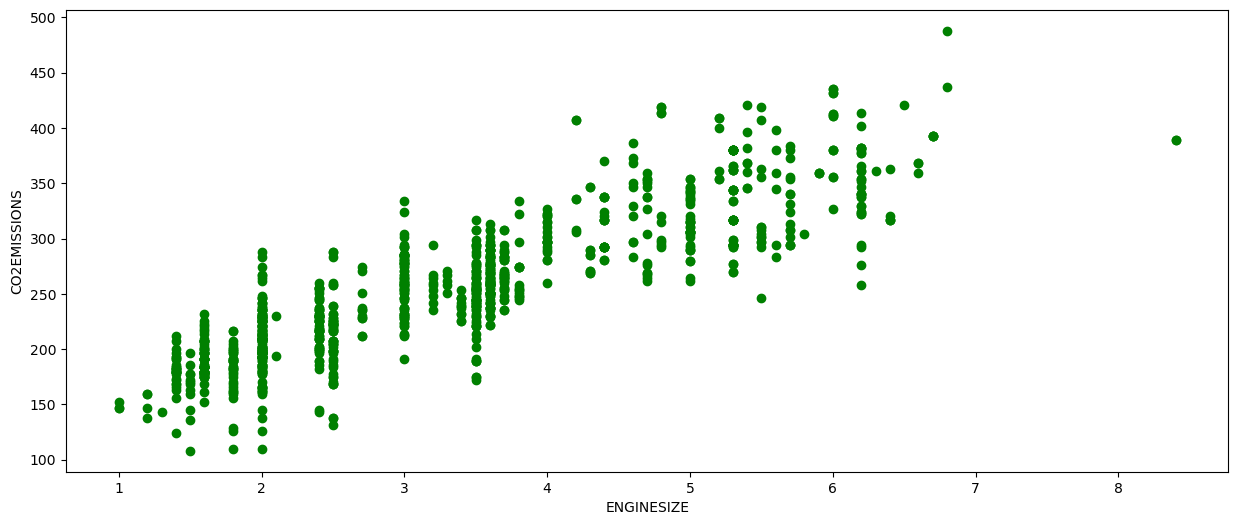

In [5]:
plt.rcParams['figure.figsize']=(15,6)
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="green")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt

In [6]:
train, test = train_test_split(df, test_size=0.2)


In [7]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

In [8]:
poly = PolynomialFeatures(degree=2)

In [9]:
train_x_poly = poly.fit_transform(train_x)

In [10]:
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  8.4 , 70.56],
       ...,
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  4.4 , 19.36]])

In [11]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [12]:
train_y_ = clf.fit(train_x_poly, train_y)

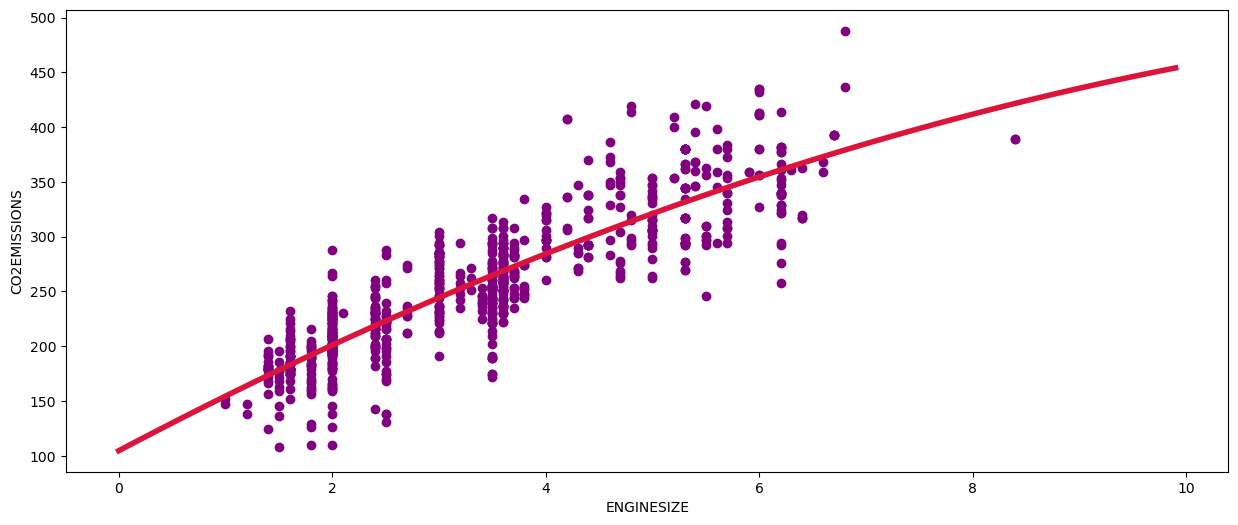

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="purple")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=4)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [14]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[104.58747893 109.71761273 114.81508956 119.87990942 124.91207231
 129.91157824 134.87842719 139.81261918 144.7141542  149.58303225
 154.41925333 159.22281744 163.99372458 168.73197476 173.43756796
 178.1105042  182.75078347 187.35840577 191.9333711  196.47567946
 200.98533086 205.46232528 209.90666274 214.31834323 218.69736675
 223.0437333  227.35744288 231.6384955  235.88689114 240.10262982
 244.28571153 248.43613627 252.55390404 256.63901484 260.69146867
 264.71126554 268.69840544 272.65288836 276.57471432 280.46388331
 284.32039534 288.14425039 291.93544848 295.69398959 299.41987374

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_x_poly=poly.transform(test_x)
predicted_y = clf.predict(test_x_poly)

mae = mean_absolute_error(test_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(test_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(test_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(test_y, predicted_y)
print("r²: ", r2)

MAE:  23.001664343444105
MSE:  914.6732807937686
RMSE:  30.243565940440433
r²:  0.7634346144390216


In [24]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

In [25]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.     2.     4.     8.   ]
 [ 1.     3.6   12.96  46.656]
 [ 1.     1.8    3.24   5.832]
 ...
 [ 1.     3.     9.    27.   ]
 [ 1.     1.8    3.24   5.832]
 [ 1.     4.    16.    64.   ]]


In [26]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [27]:
train_y_ = clf.fit(train_x_poly, train_y)

print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         29.12173847  4.87890774 -0.56300704]]
Intercept: [127.8847456]


<module 'matplotlib.pyplot' from 'c:\\Users\\DeLL\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

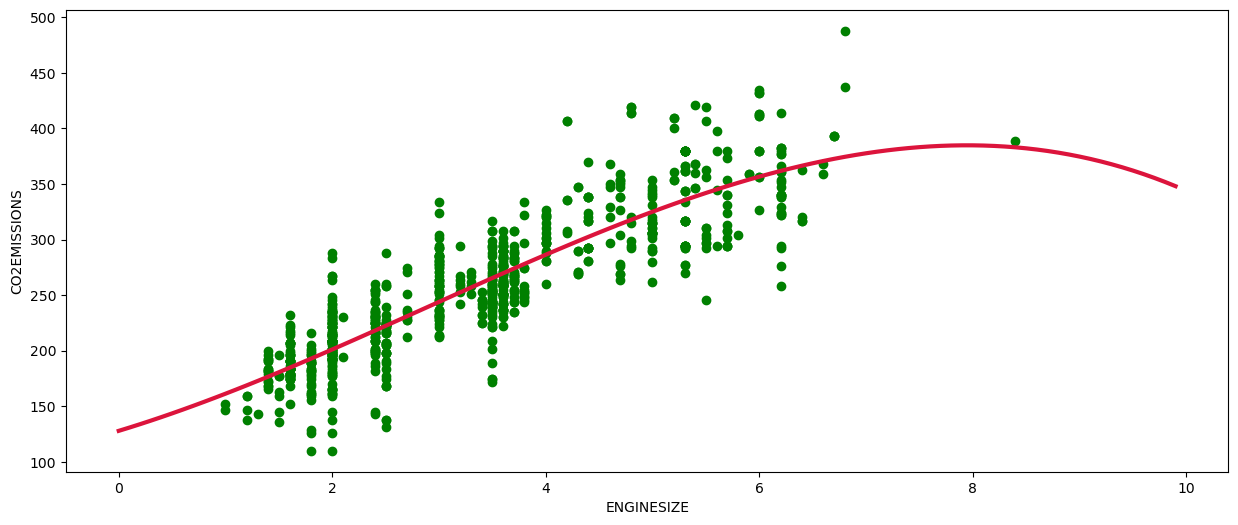

In [31]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="green")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt

In [32]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[127.8847456  130.84514551 133.89974554 137.04516764 140.27803377
 143.59496588 146.99258594 150.4675159  154.01637772 157.63579335
 161.32238476 165.0727739  168.88358274 172.75143322 176.6729473
 180.64474695 184.66345412 188.72569076 192.82807885 196.96724033
 201.13979716 205.3423713  209.5715847  213.82405934 218.09641715
 222.38528011 226.68727016 230.99900927 235.31711939 239.63822249
 243.95894051 248.27589542 252.58570918 256.88500374 261.17040106
 265.43852309 269.68599181 273.90942915 278.10545709 282.27069757
 286.40177257 290.49530402 294.5479139  298.55622416 302.51685676


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_x_poly=poly.transform(test_x)
predicted_y = clf.predict(test_x_poly)

mae = mean_absolute_error(test_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(test_y, predicted_y)
print("MSE: ", mse)

rmse=np.sqrt(mean_squared_error(test_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(test_y, predicted_y)
print("r²: ", r2)

MAE:  22.957123487210183
MSE:  869.17846926567
RMSE:  29.48183286815238
r²:  0.7748511776666214
